In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns

In [50]:
%matplotlib inline
matplotlib.rcparams['figure.fisize']=(12,8)

AttributeError: module 'matplotlib' has no attribute 'rcparams'

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Missing Values 

In [4]:
nulls = df.isnull().sum() 
nulls

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
df['score'] = df['score'].transform(lambda x: x.fillna(x.mean()))
df['votes'] = df['votes'].transform(lambda x: x.fillna(x.mean()))
df['budget'] = df['budget'].transform(lambda x: x.fillna(x.mean()))
df['gross'] = df['gross'].transform(lambda x: x.fillna(x.mean()))
df['runtime'] = df['runtime'].transform(lambda x: x.fillna(x.mean()))

In [6]:
cols = ['rating','released','writer','star','country','company']
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [7]:
null = df.isnull().sum()
null

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# type int64

In [9]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


# remove name

In [11]:
df = df.drop(['name'], 1)

In [12]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


# **released -- get year**

In [13]:
df['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [14]:
df['released']=df['released'].replace('[(United States)]','',regex=True)
df['released']=df['released'].replace('[(Cameroon)]','',regex=True)

In [15]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,R,Drama,1980,"Ju13,1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,R,Adventure,1980,"July2,1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,PG,Action,1980,"Ju20,1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,PG,Comedy,1980,"July2,1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,R,Comedy,1980,"July25,1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [16]:
df['released']

0         Ju13,1980
1        July2,1980
2         Ju20,1980
3        July2,1980
4       July25,1980
           ...     
7663     Ocb23,2020
7664     Fbuy7,2020
7665     Apl27,2020
7666      Ocb1,2020
7667    Augu19,2020
Name: released, Length: 7668, dtype: object

In [17]:
df['released']=df['released'].replace('[Jule]','',regex=True)
df['released']=df['released'].replace('[July]','',regex=True)
df['released']=df['released'].replace('[October]','',regex=True)
df['released']=df['released'].replace('[February]','',regex=True)
df['released']=df['released'].replace('[March]','',regex=True)
df['released']=df['released'].replace('[April]','',regex=True)
df['released']=df['released'].replace('[May]','',regex=True)
df['released']=df['released'].replace('[August]','',regex=True)
df['released']=df['released'].replace('[September]','',regex=True)
df['released']=df['released'].replace('[November]','',regex=True)
df['released']=df['released'].replace('[December]','',regex=True)


In [18]:
df['released']

0       13,1980
1        2,1980
2       20,1980
3        2,1980
4       25,1980
         ...   
7663    23,2020
7664     7,2020
7665    27,2020
7666     1,2020
7667    19,2020
Name: released, Length: 7668, dtype: object

# Create correct year column

In [25]:
df['yearcorrect']=df['released'].astype(str).str[2:]

In [26]:
df['yearcorrect']

0       ,1980
1        1980
2       ,1980
3        1980
4       ,1980
        ...  
7663    ,2020
7664     2020
7665    ,2020
7666     2020
7667    ,2020
Name: yearcorrect, Length: 7668, dtype: object

In [27]:
df['yeartocorrect']=df['yearcorrect'].replace('[,]','',regex=True)


In [28]:
df['yeartocorrect']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: yeartocorrect, Length: 7668, dtype: object

In [31]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yeartocorrect
0,R,Drama,1980,"13,1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,R,Adventure,1980,"2,1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,PG,Action,1980,"20,1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,PG,Comedy,1980,"2,1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,R,Comedy,1980,"25,1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [30]:
df = df.drop(['yearcorrect'], 1)

In [38]:
pd.set_option('display.max_rows',None)

In [37]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [40]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yeartocorrect
5445,PG-13,Action,2009,"18,2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,PG-13,Action,2019,"26,2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,PG-13,Drama,1997,"19,1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,PG-13,Action,2015,"18,2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,PG-13,Action,2018,"27,2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


# Drop any duplicates

In [44]:
df1=df['company'].drop_duplicates()

# Budget high correlation 
# company high correlation

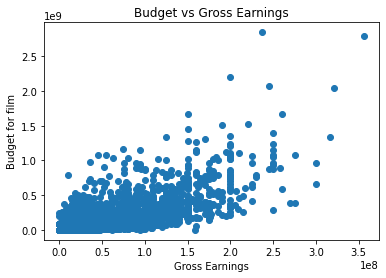

In [46]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

In [ ]:
# plot budget vs gross using seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

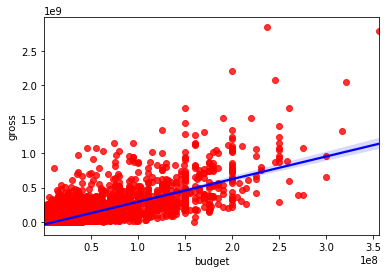

In [53]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [ ]:
# looking for correlation 

In [58]:
df.corr(method='pearson') # pearson , kendall , spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [59]:
# high correlation between budgetn and gross 


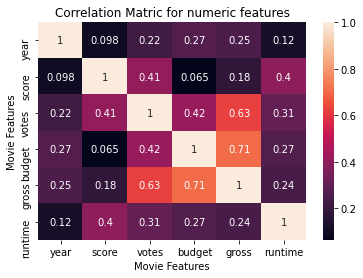

In [63]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [64]:
#looks at company

In [65]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['company']= label_encoder.fit_transform(df['company']) 
print(df.head())

     rating   genre  year released  score      votes       director  \
5445  PG-13  Action  2009  18,2009    7.8  1100000.0  James Cameron   
7445  PG-13  Action  2019  26,2019    8.4   903000.0  Anthony Russo   
3045  PG-13   Drama  1997  19,1997    7.8  1100000.0  James Cameron   
6663  PG-13  Action  2015  18,2015    7.8   876000.0    J.J. Abrams   
7244  PG-13  Action  2018  27,2018    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross  company  runtime yeartocorrect  
5445  2847246203     2253    162.0          2009  
7445  2797501328     1606    181

In [69]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


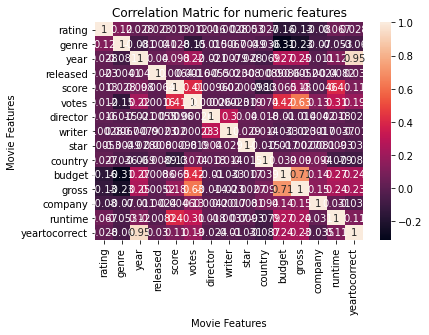

In [73]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [74]:
df_numerized.corr()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yeartocorrect
rating,1.000000,0.123465,0.027931,0.022821,0.013246,0.012378,0.016255,-0.002795,0.005314,0.026930,-0.156544,-0.130083,-0.079626,0.066641,0.028376
genre,0.123465,1.000000,-0.081261,-0.004117,0.027959,-0.145276,-0.015258,0.006746,-0.004856,-0.035896,-0.310566,-0.230267,-0.070013,-0.052699,-0.059821
year,0.027931,-0.081261,1.000000,0.040090,0.097936,0.222810,-0.020795,-0.007901,-0.027745,-0.069423,0.265578,0.252042,-0.011438,0.120766,0.946073
released,0.022821,-0.004117,0.040090,1.000000,0.006413,0.001598,-0.005545,-0.002291,0.008011,-0.008865,0.008643,0.005192,-0.002411,-0.008246,0.029892
score,0.013246,0.027959,0.097936,0.006413,1.000000,0.409182,0.009559,0.019795,-0.000979,-0.134577,0.064541,0.182868,-0.004594,0.399329,0.107233
votes,0.012378,-0.145276,0.222810,0.001598,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.421007,0.628713,0.130638,0.309166,0.189256
director,0.016255,-0.015258,-0.020795,-0.005545,0.009559,0.000260,1.000000,0.299512,0.039715,0.017926,-0.010364,-0.014272,0.004250,0.017624,-0.024490
writer,-0.002795,0.006746,-0.007901,-0.002291,0.019795,0.000232,0.299512,1.000000,0.028745,0.014409,-0.033217,-0.023186,0.001665,-0.003698,-0.010346
star,0.005314,-0.004856,-0.027745,0.008011,-0.000979,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.016952,-0.002683,0.008072,0.009273,-0.031013
country,0.026930,-0.035896,-0.069423,-0.008865,-0.134577,0.073582,0.017926,0.014409,-0.014749,1.000000,0.038620,0.089905,0.094210,-0.079265,-0.087350


In [76]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat .unstack()

In [77]:
sort = corr_pairs.sort_values()

In [78]:
high_corr=sort [(sort)>0.5]

In [79]:
high_corr

gross          votes            0.628713
votes          gross            0.628713
gross          budget           0.711270
budget         gross            0.711270
year           yeartocorrect    0.946073
yeartocorrect  year             0.946073
rating         rating           1.000000
writer         writer           1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
runtime        runtime          1.000000
yeartocorrect  yeartocorrect    1.000000
dtype: float64

In [ ]:
# gross & votes have the highest corr 
# gross & budget 
